<a href="https://colab.research.google.com/github/Hanjateacherson/SMHRD/blob/main/python/04_welfare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt

# 데이터 정보
- 한국 복지 패널 데이터
- 한국 보건살히연구원에서 우리나라 가구의 경제 활동을 연구해 복지 정책을 반영할 목적으로 발간한 자료
- 전국 7천여 가구를 선정해서 2006년도 ~ 2019년도까지 조사한 자료

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
welfare = pd.read_csv('/content/drive/MyDrive/data/welfare.csv')
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2,1945,2,1,NaN,NaN,1
1,1,1948,2,2,NaN,NaN,1
2,1,1942,3,1,107.0,762.0,1
3,1,1962,1,1,192.0,855.0,1
4,2,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,2,1967,1,1,NaN,NaN,5
14414,2,1992,5,1,NaN,NaN,5
14415,1,1995,5,1,NaN,910.0,5
14416,2,1998,5,1,200.0,246.0,5


In [185]:
# 결측치 개수 확인하기 ~ isnull()함수
welfare.isnull() #데이터가  NaN인경우 True, 아니면 False

welfare.isnull().sum() #True값들만 더해줌

gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

In [186]:
#copy()함수 사용해서 데이터 복사
welfare_copy = welfare.copy()

# gender 컬럼에 이상치가 있는지 확인


In [187]:
welfare_copy['gender'].value_counts()

2    7913
1    6505
Name: gender, dtype: int64

### 데이터 전처리
#### 결측치, 이상치, 컬럼이나 인덱스 변수 변경

In [188]:
# 1은 man, 2 woman 으로 변경
## 조건에 맞춰 데이터를 변경하는 함수가 2개 있음

# 1.np.where()
# 2. apply()

# np.where 사용했던 데이터를 바꿈

welfare_copy['gender'] = np.where(welfare_copy['gender']== 1, 'male','female')
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,1,NaN,NaN,1
1,male,1948,2,2,NaN,NaN,1
2,male,1942,3,1,107.0,762.0,1
3,male,1962,1,1,192.0,855.0,1
4,female,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,1,NaN,NaN,5
14414,female,1992,5,1,NaN,NaN,5
14415,male,1995,5,1,NaN,910.0,5
14416,female,1998,5,1,200.0,246.0,5


In [189]:
welfare_copy['gender'].value_counts()

female    7913
male      6505
Name: gender, dtype: int64

In [190]:
# 결측치 확인하는 방법
# isna() vs isnull() 차이

welfare_copy['gender'].isna().sum()

0

<Axes: xlabel='gender', ylabel='count'>

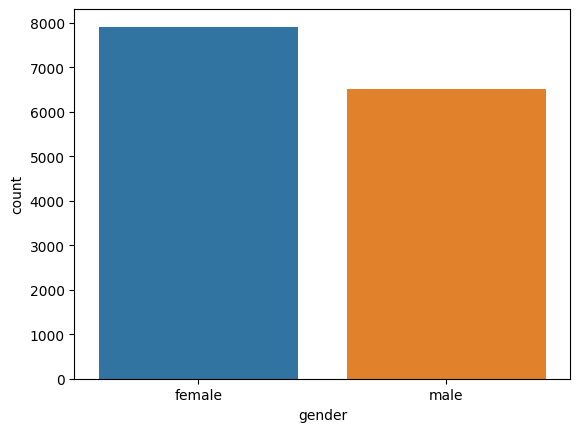

In [191]:
# countplot으로 그래프 그려보기
sns.countplot(data = welfare_copy, x = 'gender')

# 1.종교 여부가 결혼에 영향이 있을까?

## religion 컬럼
- 1 : 있음
- 2 : 없음
- 데이터를 1이면 yes , 2이면 No로 바꿔 준 후 countplot 그래프 그리기

In [192]:
welfare_copy['religion'].value_counts()

2    7815
1    6603
Name: religion, dtype: int64

In [193]:
welfare_copy['religion'] = np.where(welfare_copy['religion']==1, 'yes','no')
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,yes,NaN,NaN,1
1,male,1948,2,no,NaN,NaN,1
2,male,1942,3,yes,107.0,762.0,1
3,male,1962,1,yes,192.0,855.0,1
4,female,1963,1,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,yes,NaN,NaN,5
14414,female,1992,5,yes,NaN,NaN,5
14415,male,1995,5,yes,NaN,910.0,5
14416,female,1998,5,yes,200.0,246.0,5


<Axes: xlabel='religion', ylabel='count'>

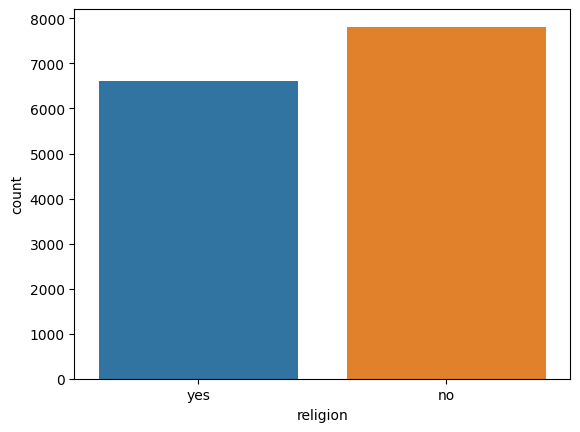

In [194]:
sns.countplot(data = welfare_copy, x ='religion')

In [195]:
welfare_copy['marriage'].value_counts()

1    7190
5    2357
0    2121
2    1954
3     689
4      78
6      29
Name: marriage, dtype: int64

In [196]:
#결측치 확인
welfare_copy['marriage'].isna().sum()

0

# marriage 컬럼 데이터 정보
- 0 : 미해당 (18세 미만)
- 1 : 결혼
- 2 : 사별
- 3 : 이혼
- 4 : 별거
- 5 : 미혼
- 6 : 기타

## 1 - marriage
## 3 - divorce
## 5 - not marriage
## 0, 2, 4, 6 - etc

#### 실습) apply 활용해서 바꾸어 주기!

In [197]:
def makeMarried(df):
  marriage=df['marriage']
  if marriage == 1:
    return "marriage"
  elif marriage == 3 :
    return "divorce"
  elif marriage == 5:
    return "not marriage"
  else :
    return "etc"

In [198]:
welfare_copy['marriage'] = welfare_copy.apply(makeMarried, axis = 1)
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [199]:
welfare_copy['marriage'].value_counts()

marriage        7190
etc             4182
not marriage    2357
divorce          689
Name: marriage, dtype: int64

# 종교유무에 따라 결혼/ 이혼률 구하기

In [200]:
# 결혼했는지 이혼 했는지의 데이터
welfare_copy.query('marriage == "marriage"')

,gender,birth,marriage,religion,income,code_job,code_region
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
6,male,1927,marriage,yes,NaN,NaN,1
7,female,1934,marriage,yes,27.0,941.0,1
11,male,1940,marriage,no,NaN,NaN,1
...,...,...,...,...,...,...,...
14408,female,1936,marriage,no,NaN,611.0,6
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [201]:
# 이혼 여부
welfare_copy.query('marriage == "divorce"')

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
9,female,1970,divorce,yes,NaN,NaN,1
32,female,1961,divorce,yes,NaN,951.0,1
44,female,1954,divorce,no,250.0,421.0,1
57,female,1937,divorce,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14337,male,1956,divorce,no,NaN,NaN,6
14343,male,1952,divorce,yes,NaN,NaN,6
14372,male,1963,divorce,yes,NaN,NaN,1
14373,male,1950,divorce,yes,NaN,NaN,5


In [202]:
# 결혼한 사람들의 종교 유무 파악
welfare_copy.query('marriage == "marriage"').groupby('religion').agg(cnt=('religion','count'))

,cnt
religion,
no,3660
yes,3530


퍼센

#### 결혼 여부가 종교의 유무와 큰 상관 없다

### 백분율로 나타내기

In [207]:
wel_marr = welfare_copy.query("marriage == 'marriage' or marriage == 'divorce'")

In [209]:
wel_marr.groupby('religion').agg(cnt = ('religion','count'))

,cnt
religion,
no,4044
yes,3835


In [220]:
wel_marr.groupby('religion')['marriage'].value_counts()

religion  marriage
no        marriage    3660
          divorce      384
yes       marriage    3530
          divorce      305
Name: marriage, dtype: int64

In [223]:
wel_per = wel_marr.groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)

In [225]:
wel_per['proprotion'] = wel_per['proportion']*100
wel_per

,religion,marriage,proportion,proprotion
0,no,marriage,0.905045,90.504451
1,no,divorce,0.094955,9.495549
2,yes,marriage,0.920469,92.046936
3,yes,divorce,0.079531,7.953064


<Axes: xlabel='religion', ylabel='proportion'>

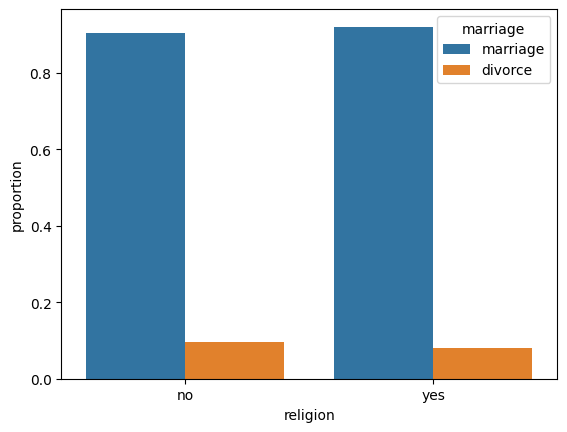

In [226]:
sns.barplot(data = wel_per, x='religion', y='proportion',hue='marriage')

#### conclusion : 종교와 이혼은 크게 관련 없다

In [228]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [229]:
welfare_copy['income'].isna().sum()

9884

In [230]:
welfare_copy['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [231]:
#이상치 발견
# min값이 왜 0일까?

In [232]:
# 이상치 발견
# min 값이 왜 0일까?
# query함수로 income == 0
welfare_copy.query('income == 0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


### encoding = 무언가를 코드화 한다는 뜻


In [233]:
job_code = pd.read_csv('/content/drive/MyDrive/data/job_code.csv', encoding ='euc-kr')
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [234]:
job_code.query("code_job == 252 | code_job == 243 | code_job == 311 | code_job == 313 |code_job == 320")

,code_job,job
35,243,간호사
42,252,학교 교사
60,311,행정 사무원
62,313,회계 및 경리 사무원
64,320,금융 사무 종사자


In [235]:
welfare_copy.query('income == 0')
# 해당 7개의 데이터 실제로 이상치

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


### 이상치를 해결하기 위한 방법
- 해당 직군의 수입 알아보기

## 데이터 오류 해결 방법 2가지
- 1. 데이터 버리기()
- 2. 데이터 채워주기(평균값, 중간값)

In [236]:
welfare_copy.query('code_job == 243')

,gender,birth,marriage,religion,income,code_job,code_region
144,female,1989,not marriage,no,208.0,243.0,1
250,female,1990,not marriage,yes,248.0,243.0,2
356,female,1978,marriage,yes,658.0,243.0,1
708,female,1987,marriage,no,305.0,243.0,2
929,female,1956,marriage,yes,258.0,243.0,1
...,...,...,...,...,...,...,...
12764,female,1996,not marriage,no,160.0,243.0,7
12863,female,1983,not marriage,no,436.0,243.0,2
13113,female,1962,not marriage,no,416.0,243.0,7
13391,female,1983,not marriage,no,258.0,243.0,3


In [237]:
welfare_copy['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [238]:
# code_job == NaN 값인데  수입이 있는 사람
welfare_copy.query('code_job.isna() and income.notna()')
# 결과 : 없음

,gender,birth,marriage,religion,income,code_job,code_region


In [239]:
# income NaN 인 사람
# 이상치 7명 존재
# 결측치 + 이상치 9891개
welfare_copy['income'].isna().sum(0)

9884

In [243]:
welfare_copy.query('code_job.notna() and income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
22,male,1975,not marriage,yes,NaN,521.0,1
23,male,1978,marriage,no,NaN,151.0,1
24,female,1982,marriage,no,NaN,521.0,1
32,female,1961,divorce,yes,NaN,951.0,1
33,female,1982,marriage,no,NaN,531.0,1
...,...,...,...,...,...,...,...
14399,male,1941,marriage,no,NaN,611.0,6
14408,female,1936,marriage,no,NaN,611.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [249]:
# income == NaN, code_job == NaN 인값들 drop
# drop(인덱스, axis = 0)
drop_index = welfare_copy[(welfare_copy['income'].isna()) & (welfare_copy['code_job'].isna())]
welfare_drop = welfare_copy.drop(drop_index.index)

welfare_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6878 non-null   object 
 1   birth        6878 non-null   int64  
 2   marriage     6878 non-null   object 
 3   religion     6878 non-null   object 
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  6878 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 429.9+ KB


In [250]:
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
7,female,1934,marriage,yes,27.0,941.0,1
8,female,1940,etc,yes,27.0,999.0,2
14,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5
14415,male,1995,not marriage,yes,NaN,910.0,5


In [251]:
#인덱스 정리
welfare_drop.index = range(1, len(welfare_drop)+1)
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,NaN,611.0,6
6876,male,1967,marriage,yes,NaN,874.0,5
6877,male,1995,not marriage,yes,NaN,910.0,5


In [252]:
code_median = welfare_drop[['code_job','income']].groupby('code_job').median()

In [255]:
code_median.isna().sum()

income    3
dtype: int64

In [256]:
code_median.query('income.isna()')

,income
code_job,
423.0,NaN
613.0,NaN
823.0,NaN


In [257]:
# 복잡

In [258]:
# 결측치 채우기

In [262]:
code_median.loc[welfare_drop['code_job']].values

array([[303. ],
       [251.5],
       [ 60. ],
       ...,
       [338.5],
       [260. ],
       [200. ]])

In [263]:
def fill_income(row):
    # 수입 값이 결측치 일때
    if np.isnan(row['income']):
        return code_median.loc[row['code_job']].values[0]
    # 수입 값이 결측치 아닐 때
    else:
        return row['income']

In [264]:
welfare_drop['income'] = welfare_drop.apply(fill_income, axis = 1)
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,218.0,611.0,6
6876,male,1967,marriage,yes,338.5,874.0,5
6877,male,1995,not marriage,yes,260.0,910.0,5


In [265]:
welfare_drop.query('income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
239,male,1966,marriage,no,NaN,823.0,1
240,female,1966,marriage,no,NaN,823.0,1
713,male,1947,marriage,no,NaN,823.0,1
714,female,1949,marriage,no,NaN,823.0,1
718,male,1957,marriage,no,NaN,823.0,1
719,female,1963,marriage,no,NaN,823.0,1
769,male,1975,marriage,no,NaN,823.0,1
1034,male,1959,marriage,yes,NaN,823.0,3
1066,male,1938,marriage,yes,NaN,823.0,3
1342,male,1936,etc,no,NaN,613.0,4


In [266]:
welfare_drop = welfare_drop.dropna(subset = ['income'])
welfare_drop.query('income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region


In [267]:
# income이 nan 값 삭제
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,218.0,611.0,6
6876,male,1967,marriage,yes,338.5,874.0,5
6877,male,1995,not marriage,yes,260.0,910.0,5


In [268]:
# 성별로 묶어보기
gender_income = welfare_drop.groupby('gender', as_index=False).agg(income_mean =('income','mean'))

In [269]:
gender_income

,gender,income_mean
0,female,189.871704
1,male,311.430076


<Axes: xlabel='gender', ylabel='income_mean'>

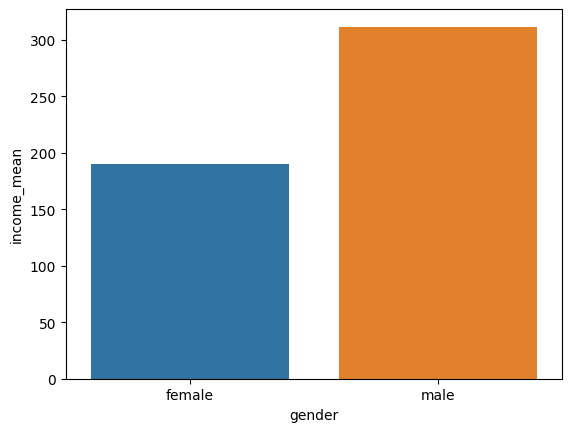

In [270]:
sns.barplot(data = gender_income, x = 'gender', y = 'income_mean')

#실제로 남성이 여성보다 평균 임금이 높습니다

#### 결측치 버렸을때 위 값이랑 차이가 있는지

In [271]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [272]:
welfare_copy['income'].isna().sum()

9884

In [273]:
# 값이 0인 7개의 데이터
welfare_copy.query('income == 0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


In [274]:
# 1. 7개의 데이터를 NaN 값으로 바꾸고
# 2. NaN값 모두 버리기
welfare_drop2 = welfare_copy.copy()

In [275]:
welfare_drop2

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [276]:
welfare_drop2['income'] = np.where(welfare_drop2['income']==0, np.nan, welfare_drop2['income'])
welfare_drop2['income'].isna().sum()

9891

In [277]:
#결측치 제거- dropna 사용해서 모두 제거
welfare_drop2 = welfare_drop2.dropna(subset =['income'])
welfare_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4527 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       4527 non-null   object 
 1   birth        4527 non-null   int64  
 2   marriage     4527 non-null   object 
 3   religion     4527 non-null   object 
 4   income       4527 non-null   float64
 5   code_job     4527 non-null   float64
 6   code_region  4527 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 282.9+ KB


In [278]:
# 결측치를 버린 데이터
welfare_drop2.groupby('gender').agg(income_mean = ('income','mean'))

,income_mean
gender,
female,186.875782
male,349.037571


In [279]:
# 결측치를 채운 데이터
gender_income

,gender,income_mean
0,female,189.871704
1,male,311.430076
